# Лабораторная работа по KAN

In [1]:
# (Просьба к трудягам: Дополнительно заполните информацию о команде, которая будет решать эту лабу)
# Выполнили:
# - Хуртин Алексей
# - Спасюк Мария
# - Иконников Александр

# Теоретическая часть (4 балла)

(1 балл) В чём различия между архитектурами KAN и MLP?

Ответ: В MLP слои нейронов имеют фиксированные активационные функции, а веса применяются только к рёбрам, в то время как в KAN веса задаются ещё и для самих активационных функций, которые тоже изменяются в процессе обучения, это позволяет добиться большей точности на меньших размерах графов, но ведёт к более сложному и долгому обучению. Так как KAN имеют обучаемые функции активации на ребрах, а MLP имеют функции активации на узлах, это делает KAN лучше MLP с точки зрения как точности модели, так и интерпретируемости.

(1 балл)
Предложите способ модификации KAN для повышения его устойчивости к шуму в данных?

Ответ: Можно попробовать заменить стандартные функции на менее восприимчивые к шуму или к скрытым слоям добавить слой сглаживания, минимизирующий шум.

(1 балл) Какой класс функций используется в KAN вместо стандартных нейронов с весами и активациями? Почему это важно?

Ответ: В KAN используются базисные функции, как, например, сплайны, которые аппроксимируют зависимость между входными и выходными данными, что позволяет более наглядно отслеживать возникающие взаимосвязи и способствует уменьшенному восприятию шума в данных.

(1 балл) Как KAN может частично смягчить проблему “проклятия размерности”?

Ответ: Проблема связана с сильным ростом сложности вычислений с ростом размерности пространства, но так как KAN основана на теореме Колмогорова-Арнольда, утверждающей, что функция многих переменных может быть представлена как суперпозиция функций одной переменной и сложения, то она намного проще взаимодействует с многомерными пространствами (функциями многих переменных) через более легкийэе в вычислении функции одной переменной.

## Установка и подключение библиотеки

In [2]:
from IPython.display import clear_output

In [3]:
!pip install pykan torch scikit-learn matplotlib pandas plotly

clear_output()

In [4]:
from kan import *

import torch
import numpy as np
import matplotlib.pyplot as plt

# 1. Регрессия

## 1.1 Пример решения задачи

In [5]:
def test_function(x: np.ndarray):
    # f(x1, x2) = x1*x2
    return x[:, 0] * x[:, 1]

In [6]:
model = KAN(width=[2,8,1], grid=5, k=5, seed=0)
dataset = create_dataset(test_function, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

checkpoint directory created: ./model
saving model version 0.0


(torch.Size([1000, 2]), torch.Size([1000, 1]))

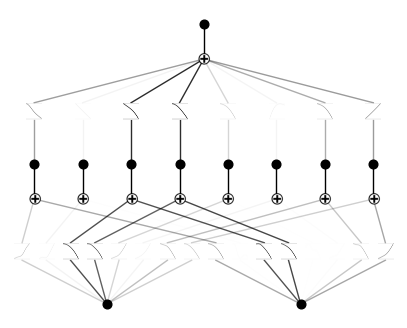

In [7]:
model(dataset['train_input']);
model.plot()

| train_loss: 2.17e-03 | test_loss: 2.30e-03 | reg: 1.25e+01 | : 100%|█| 10/10 [00:24<00:00,  2.46s/


saving model version 0.1


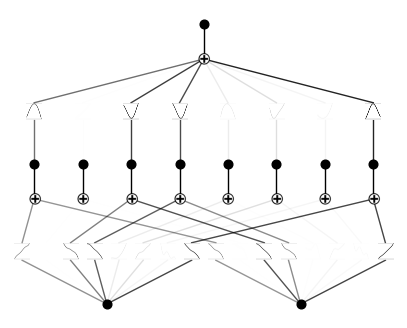

In [8]:
model.fit(dataset, opt="LBFGS", steps=10, lamb=0.00001);
model.plot()

saving model version 0.2


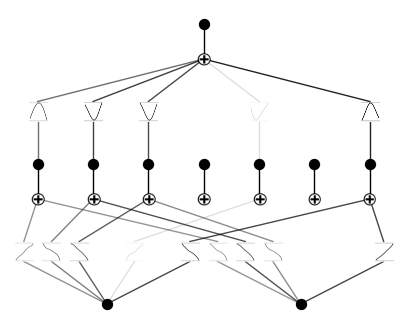

In [9]:
model = model.prune()
model.plot()

In [10]:
from kan.utils import ex_round
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)
ex_round(model.symbolic_formula()[0][0],4)

fixing (0,0,0) with x, r2=0.9941099882125854, c=1
fixing (0,0,1) with x, r2=0.960817813873291, c=1
fixing (0,0,2) with x, r2=0.992458164691925, c=1
fixing (0,0,3) with 0
fixing (0,0,4) with x, r2=0.9792514443397522, c=1
fixing (0,0,5) with 0
fixing (0,0,6) with x, r2=0.9896129965782166, c=1
fixing (0,1,0) with x, r2=0.976674497127533, c=1
fixing (0,1,1) with x, r2=0.9925536513328552, c=1
fixing (0,1,2) with x, r2=0.971173107624054, c=1
fixing (0,1,3) with 0
fixing (0,1,4) with 0
fixing (0,1,5) with 0
fixing (0,1,6) with x, r2=0.9953663349151611, c=1
fixing (1,0,0) with sin, r2=0.9951462149620056, c=2
fixing (1,1,0) with sin, r2=0.9928112626075745, c=2
fixing (1,2,0) with sin, r2=0.9960651993751526, c=2
fixing (1,3,0) with 0
fixing (1,4,0) with x, r2=0.8393150568008423, c=1
fixing (1,5,0) with 0
fixing (1,6,0) with sin, r2=0.9918760657310486, c=2
saving model version 0.3


0.0216*x_1 + 0.5988*sin(-0.8113*x_1 + 0.8424*x_2 + 1.515) + 0.6177*sin(0.5584*x_1 - 0.5356*x_2 + 1.6062) + 0.2774*sin(0.8656*x_1 + 1.3471*x_2 - 7.9913) - 0.2314*sin(1.4462*x_1 + 0.9473*x_2 + 1.6542) - 0.7199

In [11]:
#

## 1.1 Практическая Задача (3 балла)

In [12]:
#
# Вам данана функция target_function. Задача заключается в апроксимации этой функции с помощью KAN из библиотеки pykan.
# Рекомендовано работать по примеру выше. Сторонние решения также будут приниматься
#
def target_function(x: np.ndarray):
    # f(x1, x2) = x1^2 + sin(x2)
    return x[:, 0]**2 + np.sin(x[:, 1])

In [13]:
#
# 1. Сформируйте датасет
#
# Оценивание: 0.5 балла
#

#
# <ваш код здесь>
#
dataset = create_dataset(target_function, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.46e-03 | test_loss: 1.40e-03 | reg: 1.10e+01 | : 100%|█| 10/10 [00:04<00:00,  2.00it


saving model version 0.1
saving model version 0.2


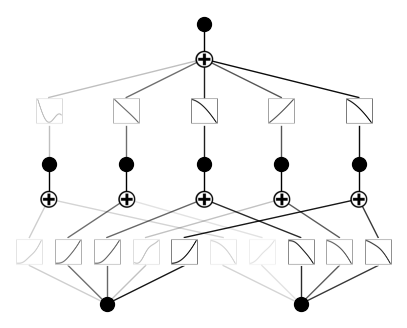

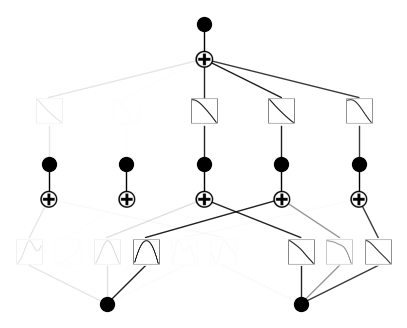

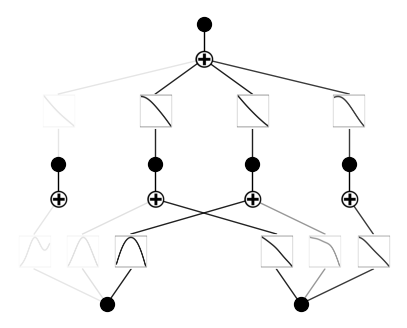

In [14]:
#
# (Для воспроизводимости результата поставьте seed=0 в настройке KAN, см. пример выше)
# 2. Обучите модель KAN. Используйте разные гиперпараметры (width, grid, k). Достаточно обучить 3 модели.

#
# Оценивание: 1.5 балла
#

#
# <ваш код здесь>
#
model1 = KAN(width=[2,5,1], grid=4, k=5, seed=0)
model1(dataset['train_input']);
model1.plot()
model1.fit(dataset, opt="LBFGS", steps=10, lamb=0.00001);
model1.plot()
model1 = model1.prune()
model1.plot()

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.08e-03 | test_loss: 2.06e-03 | reg: 1.09e+01 | : 100%|█| 10/10 [00:04<00:00,  2.03it


saving model version 0.1
saving model version 0.2


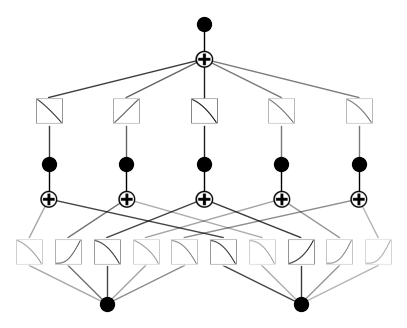

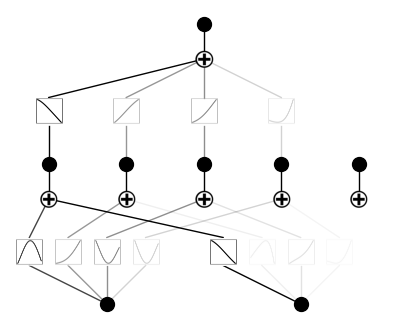

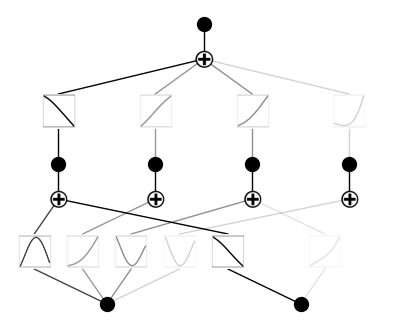

In [15]:
dataset = create_dataset(target_function, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape
model2 = KAN(width=[2,5,1], grid=2, k=5, seed=0)
model2(dataset['train_input']);
model2.plot()
model2.fit(dataset, opt="LBFGS", steps=10, lamb=0.00001);
model2.plot()
model2 = model2.prune()
model2.plot()

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.52e-03 | test_loss: 1.56e-03 | reg: 1.32e+01 | : 100%|█| 10/10 [00:09<00:00,  1.03it


saving model version 0.1
saving model version 0.2


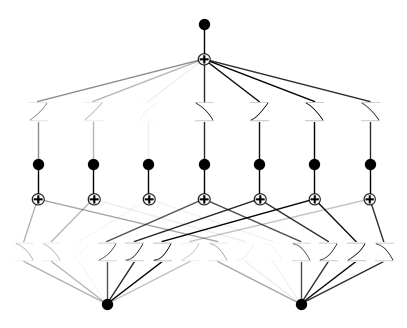

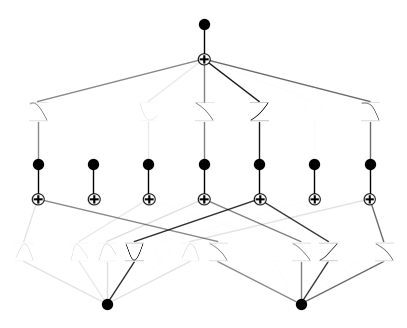

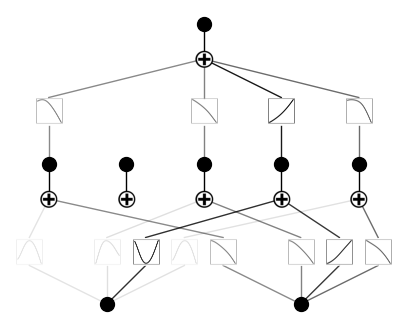

In [16]:
dataset = create_dataset(target_function, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape
model3 = KAN(width=[2,7,1], grid=4, k=7, seed=0)
model3(dataset['train_input']);
model3.plot()
result3 = model3.fit(dataset, opt="LBFGS", steps=10, lamb=0.00001);
model3.plot()
model3 = model3.prune()
model3.plot()

In [17]:
#
# 3. Постройте графики полученной поверхности для каждой обученной модели
# (рекомендовано использовать интерактивные графики, реализуемые с помощью библиотеки plotly).
#
# Оценивание: 1 балл
#

#
# <ваш код здесь>
#
!pip install plotly
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
print(plotly.__version__)

5.24.1


График для первой модели

In [18]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x_grid, y_grid = np.meshgrid(x, y)
X_grid = np.column_stack((x_grid.ravel(), y_grid.ravel()))

X_grid_tensor = torch.tensor(X_grid, dtype=torch.float32)
z = model1(X_grid_tensor)
z_values = z.detach().numpy()
z_grid = z_values.reshape(x_grid.shape)


fig = go.Figure(data=[go.Surface(z=z_grid, x=x_grid, y=y_grid)])
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)
fig.show()

График для второй модели

In [19]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x_grid, y_grid = np.meshgrid(x, y)
X_grid = np.column_stack((x_grid.ravel(), y_grid.ravel()))

X_grid_tensor = torch.tensor(X_grid, dtype=torch.float32)
z = model2(X_grid_tensor)
z_values = z.detach().numpy()
z_grid = z_values.reshape(x_grid.shape)


fig = go.Figure(data=[go.Surface(z=z_grid, x=x_grid, y=y_grid)])
fig.update_layout(
    scene=dict(
        xaxis_title='X1',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)
fig.show()

График для третьей модели

In [20]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x_grid, y_grid = np.meshgrid(x, y)
X_grid = np.column_stack((x_grid.ravel(), y_grid.ravel()))

X_grid_tensor = torch.tensor(X_grid, dtype=torch.float32)
z = model3(X_grid_tensor)
z_values = z.detach().numpy()
z_grid = z_values.reshape(x_grid.shape)


fig = go.Figure(data=[go.Surface(z=z_grid, x=x_grid, y=y_grid)])
fig.update_layout(
    scene=dict(
        xaxis_title='X1',
        yaxis_title='Y',
        zaxis_title='Z'
    )
)
fig.show()

# 2. Классификация

## 2.1 Пример решения задачи классификации

In [21]:
from sklearn.datasets import make_moons

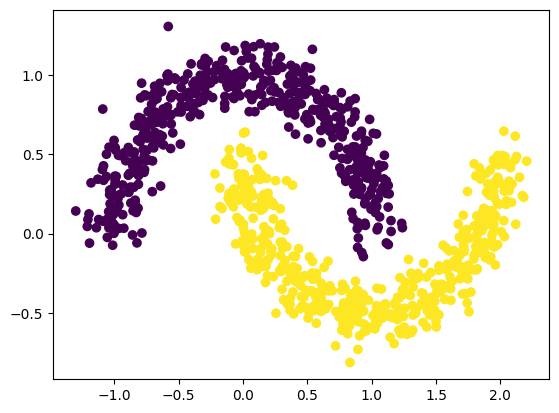

In [22]:
dataset = {}
train_input, train_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)
test_input, test_label = make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=None)

dataset['train_input'] = torch.from_numpy(train_input).float()
dataset['test_input'] = torch.from_numpy(test_input).float()
dataset['train_label'] = torch.from_numpy(train_label[:,None]).float()
dataset['test_label'] = torch.from_numpy(test_label[:,None]).float()

X = dataset['train_input']
y = dataset['train_label']
plt.scatter(X[:,0], X[:,1], c=y[:,0])
plt.show()

In [23]:
model = KAN(width=[2,1], grid=3, k=3)

checkpoint directory created: ./model
saving model version 0.0


In [24]:
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())

In [25]:
results = model.fit(dataset, opt="LBFGS", steps=1, metrics=(train_acc, test_acc))

| train_loss: 1.73e-01 | test_loss: 1.73e-01 | reg: 3.85e+00 | : 100%|█| 1/1 [00:00<00:00,  5.19it/s

saving model version 0.1


In [26]:
results['train_acc'][-1], results['test_acc'][-1]

(0.9900000095367432, 0.9850000143051147)

## 2.2 Практическая задача (3 балла)

In [27]:
#
# Вам предстоит решить задачу классификации с использованием KAN.
# В качестве датасета будет использоваться набор данных о классфикации цветков ириса
#
from sklearn.datasets import load_iris

In [98]:
#
# 1. Сформируйте датасет
#
# Оценивание: 0.5 балла
#

from sklearn.model_selection import train_test_split

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_iris = load_iris()
data = data_iris.data
target = data_iris.target

data_tensor = torch.tensor(data, dtype=torch.float32)
target_tensor = torch.tensor(target, dtype=torch.long)

X_train, x_test, y_train, y_test = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

# необходимо перемешать данные
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test, y_test), batch_size=1, shuffle=False)

train_inputs = torch.empty(0, 4)
train_labels = torch.empty(0, dtype=torch.long)
test_inputs = torch.empty(0, 4)
test_labels = torch.empty(0, dtype=torch.long)

for data, labels in train_loader:
  train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
  train_labels = torch.cat((train_labels, labels.to(device)), dim=0)
for data, labels in test_loader:
  test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
  test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

dataset = {}
dataset['train_input'] = train_inputs
dataset['test_input'] = test_inputs
dataset['train_label'] = train_labels
dataset['test_label'] = test_labels

In [32]:
#
# (Для воспроизводимости результата поставьте seed=0 в настройке KAN, см. пример выше)
# 2. Обучите модель KAN. Используйте разные гиперпараметры (width, grid, k). Достаточно обучить 3 модели.

#
# Оценивание: 1.5 балла
#

model1_clf = KAN(width=[4, 5, 3], grid=5, k=3, seed = 0)
model1_clf(dataset['train_input'])

def train_acc():
    return torch.mean((torch.argmax(model1_clf(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model1_clf(dataset['test_input']), dim=1) == dataset['test_label']).float())

results1 = model1_clf.fit(dataset, opt="Adam", metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=100, lamb=0.01, lamb_entropy=10.)
clear_output()

In [33]:
results1['train_acc'][-1], results1['test_acc'][-1]

(0.9416666626930237, 1.0)

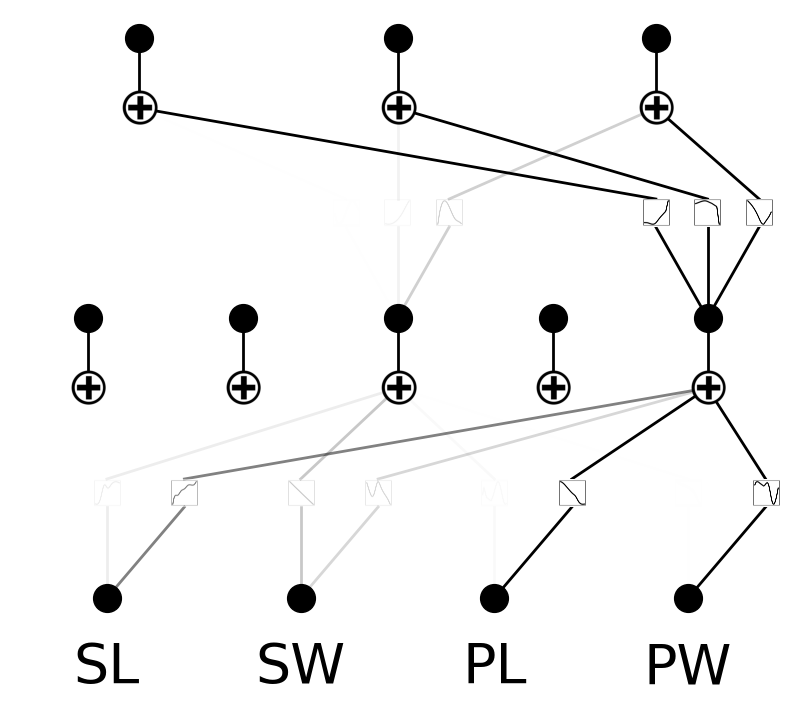

In [34]:
model1_clf(dataset['train_input'])
model1_clf.plot(beta=100, scale=1, in_vars=['SL', 'SW', 'PL', 'PW'])

In [35]:
model2_clf = KAN(width=[4, 6, 3], grid=6, k=3, seed = 0)
model2_clf(dataset['train_input'])

def train_acc():
    return torch.mean((torch.argmax(model2_clf(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model2_clf(dataset['test_input']), dim=1) == dataset['test_label']).float())

results2 = model2_clf.fit(dataset, opt="Adam", metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=100, lamb=0.01, lamb_entropy=10.)
clear_output()

In [36]:
results2['train_acc'][-1], results2['test_acc'][-1]

(1.0, 0.9666666388511658)

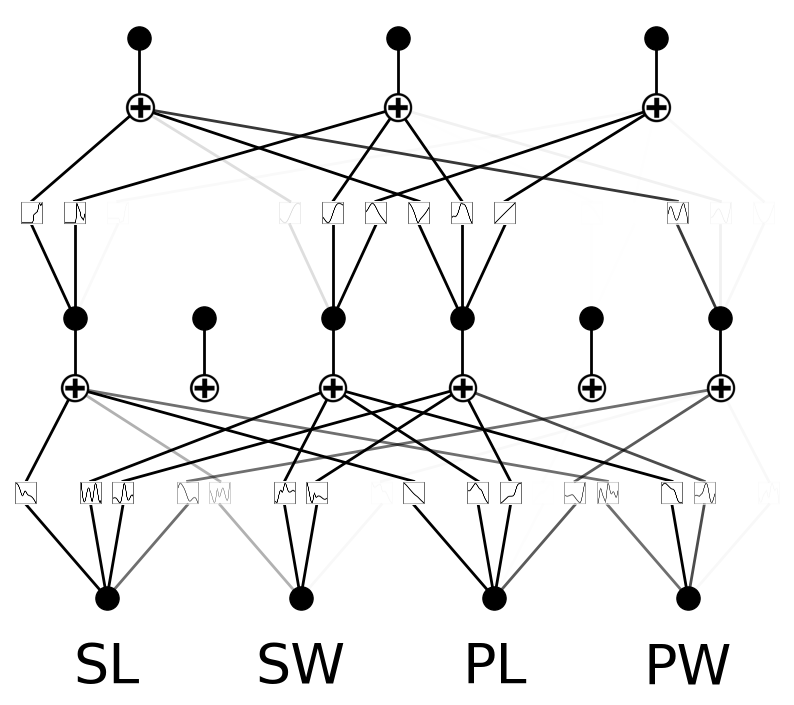

In [37]:
model2_clf(dataset['train_input'])
model2_clf.plot(beta=100, scale=1, in_vars=['SL', 'SW', 'PL', 'PW'])

In [104]:
model3_clf = KAN(width=[4, 7, 3], grid=6, k=4, seed = 0)
model3_clf(dataset['train_input'])

def train_acc():
    return torch.mean((torch.argmax(model3_clf(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model3_clf(dataset['test_input']), dim=1) == dataset['test_label']).float())

results3 = model3_clf.fit(dataset, opt="Adam", metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=100, lamb=0.01, lamb_entropy=10.)
clear_output()

In [105]:
results3['train_acc'][-1], results2['test_acc'][-1]

(0.9833333492279053, 0.9666666388511658)

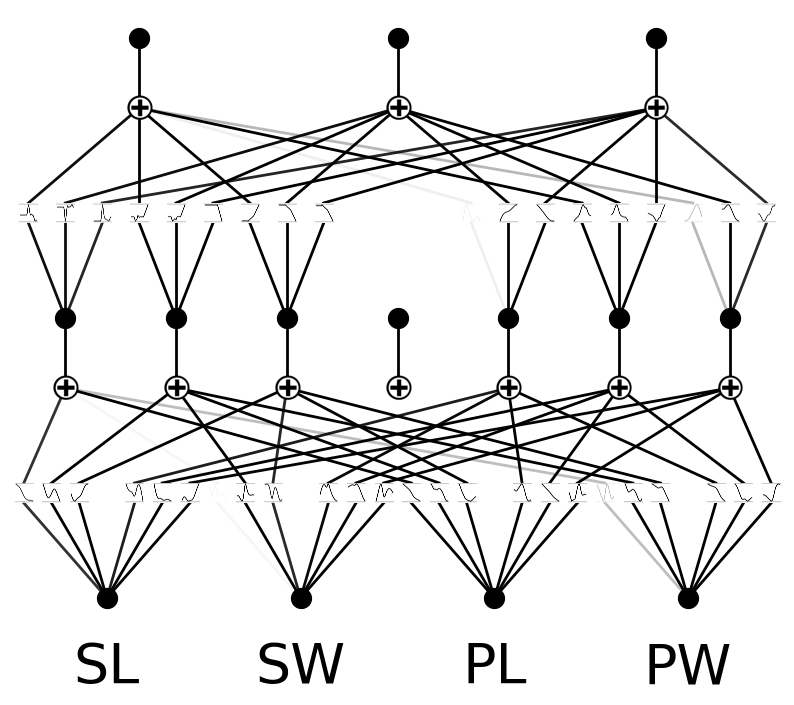

In [106]:
model3_clf(dataset['train_input'])
model3_clf.plot(beta=100, scale=1, in_vars=['SL', 'SW', 'PL', 'PW'])

In [107]:
predictions1 = model1_clf(dataset['train_input'])
predictions2 = model2_clf(dataset['train_input'])
predictions3 = model3_clf(dataset['train_input'])

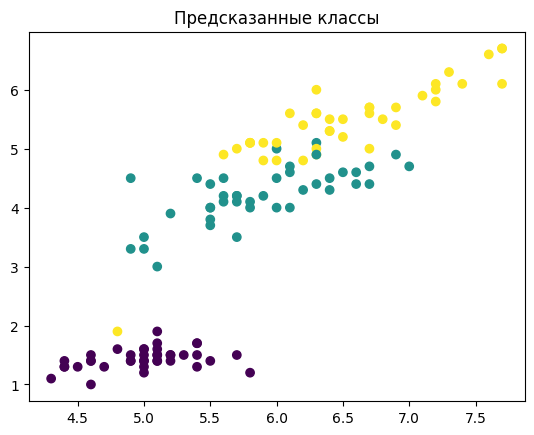

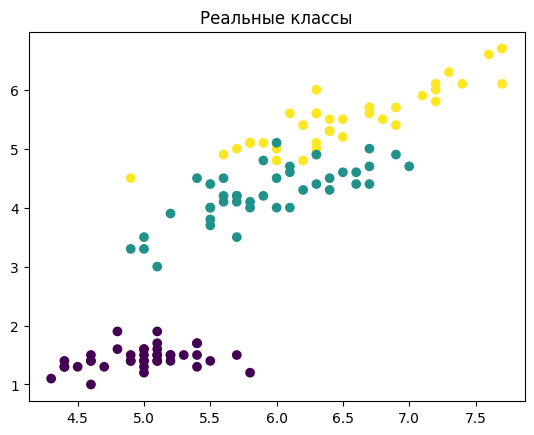

In [144]:
#
# 3. Постройте графики разделяющей поверхности для каждой обученной модели
#
# Оценивание: 1 балла
#
import matplotlib.pyplot as plt
import numpy as np

tags1 = [np.argmax(x) for x in predictions1.detach().cpu().numpy()]
fig = plt.figure()
ax = fig.add_subplot()

x = train_inputs[:,0]
y = train_inputs[:,2]
plt.title("Предсказанные классы")
plt.scatter(x, y, c = tags1)
plt.show()
plt.title("Реальные классы")
plt.scatter(x,y,c=train_labels)
plt.show()


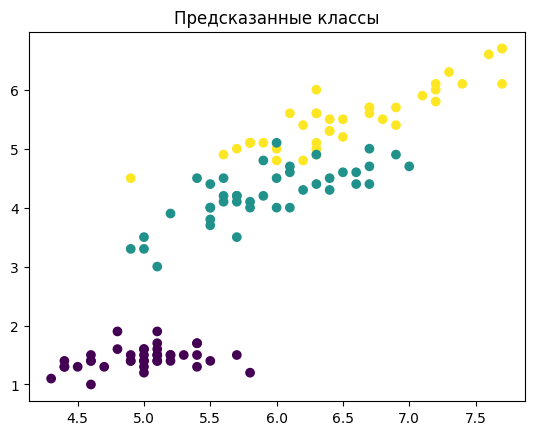

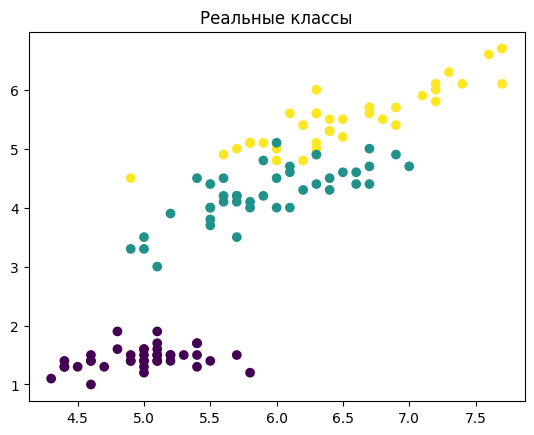

In [145]:
tags2 = [np.argmax(x) for x in predictions2.detach().cpu().numpy()]
fig = plt.figure()
ax = fig.add_subplot()

x = train_inputs[:,0]
y = train_inputs[:,2]
plt.title("Предсказанные классы")
plt.scatter(x, y, c = tags2)
plt.show()
plt.title("Реальные классы")
plt.scatter(x,y,c=train_labels)
plt.show()

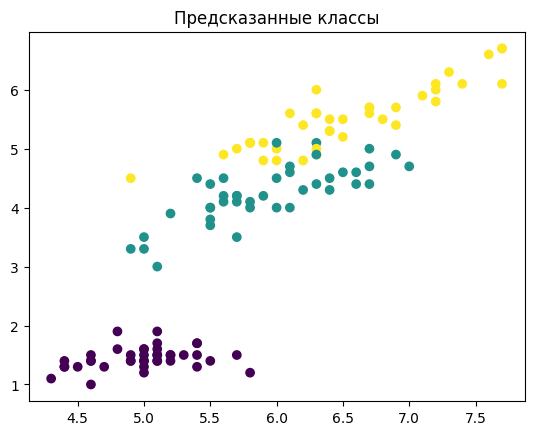

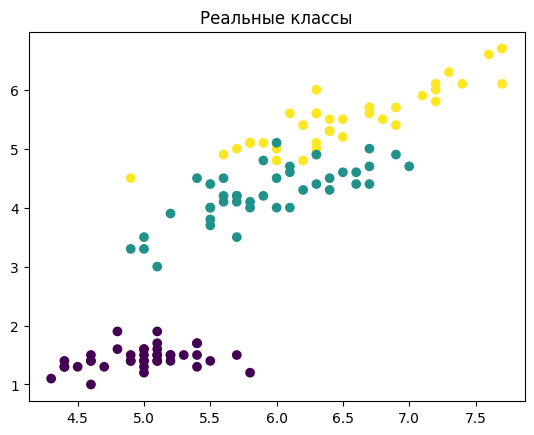

In [146]:
tags3 = [np.argmax(x) for x in predictions3.detach().cpu().numpy()]
fig = plt.figure()
ax = fig.add_subplot()

x = train_inputs[:,0]
y = train_inputs[:,2]
plt.title("Предсказанные классы")
plt.scatter(x, y, c = tags3)
plt.show()
plt.title("Реальные классы")
plt.scatter(x,y,c=train_labels)
plt.show()

Понизим размерность признаков до трех и визуализируем данные на графике

In [54]:
data = data_iris.data
target = data_iris.target

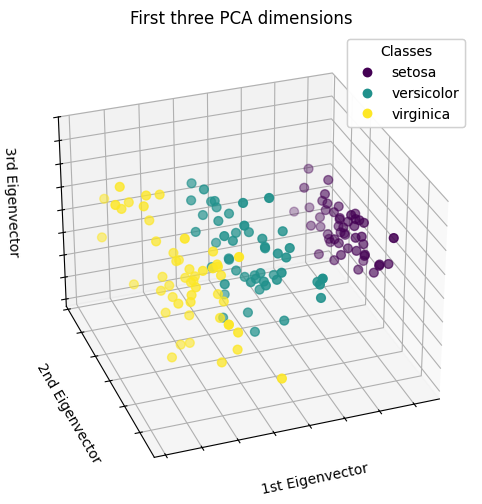

In [55]:
import matplotlib.pyplot as plt

import mpl_toolkits.mplot3d
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(data)
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=target,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    data_iris.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

Понизим размерность до 2 и построим графики с разделяющими плоскостями

In [56]:
X_reduced = PCA(n_components=2).fit_transform(data)

In [58]:
data_tensor = torch.tensor(X_reduced, dtype=torch.float32)
target_tensor = torch.tensor(target, dtype=torch.long)

X_train, x_test, y_train, y_test = train_test_split(data_tensor, target_tensor, test_size=0.2, random_state=42)

# необходимо перемешать данные
train_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(X_train, y_train), batch_size=1, shuffle=True)
test_loader = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(x_test, y_test), batch_size=1, shuffle=False)

train_inputs = torch.empty(0, 2)
train_labels = torch.empty(0, dtype=torch.long)
test_inputs = torch.empty(0, 2)
test_labels = torch.empty(0, dtype=torch.long)

for data, labels in train_loader:
  train_inputs = torch.cat((train_inputs, data.to(device)), dim=0)
  train_labels = torch.cat((train_labels, labels.to(device)), dim=0)
for data, labels in test_loader:
  test_inputs = torch.cat((test_inputs, data.to(device)), dim=0)
  test_labels = torch.cat((test_labels, labels.to(device)), dim=0)

dataset2d = {}
dataset2d['train_input'] = train_inputs
dataset2d['test_input'] = test_inputs
dataset2d['train_label'] = train_labels
dataset2d['test_label'] = test_labels

In [128]:
model1_clf2d = KAN(width=[2, 5, 3], grid=5, k=3, seed = 0)
model1_clf2d(dataset2d['train_input'])

def train_acc():
    return torch.mean((torch.argmax(model1_clf2d(dataset2d['train_input']), dim=1) == dataset2d['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model1_clf2d(dataset2d['test_input']), dim=1) == dataset2d['test_label']).float())

results1_2d = model1_clf2d.fit(dataset2d, opt="Adam", metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=100, lamb=0.01, lamb_entropy=10.)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.50e-01 | test_loss: 2.76e-01 | reg: 5.31e+01 | : 100%|█| 100/100 [00:04<00:00, 23.28


saving model version 0.1


In [129]:
results1_2d["train_acc"][-1], results1_2d["test_acc"][-1]

(0.9666666388511658, 0.9666666388511658)

In [130]:
model2_clf2d = KAN(width=[2, 6, 3], grid=6, k=3, seed = 0)
model2_clf2d(dataset['train_input'])

def train_acc():
    return torch.mean((torch.argmax(model2_clf2d(dataset2d['train_input']), dim=1) == dataset2d['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model2_clf2d(dataset2d['test_input']), dim=1) == dataset2d['test_label']).float())

results2_2d = model2_clf2d.fit(dataset2d, opt="Adam", metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=100, lamb=0.01, lamb_entropy=10.)
clear_output()

In [131]:
results2_2d["train_acc"][-1], results2_2d["test_acc"][-1]

(1.0, 1.0)

In [126]:
model3_clf2d = KAN(width=[2, 7, 3], grid=6, k=4, seed = 0)
model3_clf2d(dataset['train_input'])

def train_acc():
    return torch.mean((torch.argmax(model3_clf2d(dataset2d['train_input']), dim=1) == dataset2d['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model3_clf2d(dataset2d['test_input']), dim=1) == dataset2d['test_label']).float())

results3_2d = model3_clf2d.fit(dataset2d, opt="Adam", metrics=(train_acc, test_acc),
                      loss_fn=torch.nn.CrossEntropyLoss(), steps=100, lamb=0.01, lamb_entropy=10.)

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.50e-02 | test_loss: 7.70e-01 | reg: 2.25e+02 | : 100%|█| 100/100 [00:03<00:00, 30.92

saving model version 0.1


In [127]:
results3_2d["train_acc"][-1], results3_2d["test_acc"][-1]

(1.0, 0.9666666388511658)

In [114]:
x_grid, y_grid = np.meshgrid(np.linspace(-4, 9, 400), np.linspace(-2, 9, 400))
xy = np.stack([x_grid, y_grid], axis=2).reshape(-1, 2).astype(float)
xy = torch.from_numpy(xy)

In [133]:
tags1 = [np.argmax(x) for x in model1_clf2d(xy.float()).detach().cpu().numpy()]
tags2 = [np.argmax(x) for x in model2_clf2d(xy.float()).detach().cpu().numpy()]
tags3 = [np.argmax(x) for x in model3_clf2d(xy.float()).detach().cpu().numpy()]

График для первой модели

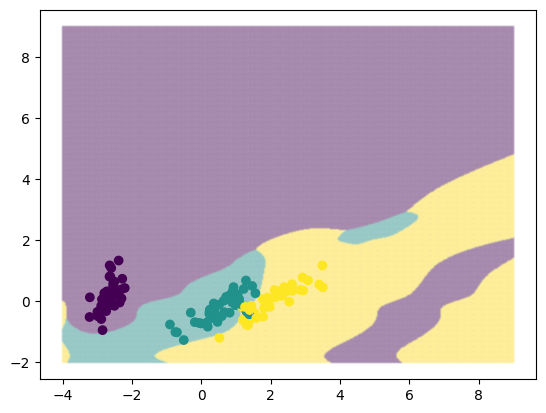

In [134]:
plt.scatter(xy[:, 0], xy[:, 1], c=tags1, alpha=0.07, s=1)
plt.scatter(dataset2d['train_input'][:, 0], dataset2d['train_input'][:, 1], c=dataset2d['train_label'])

График для второй модели

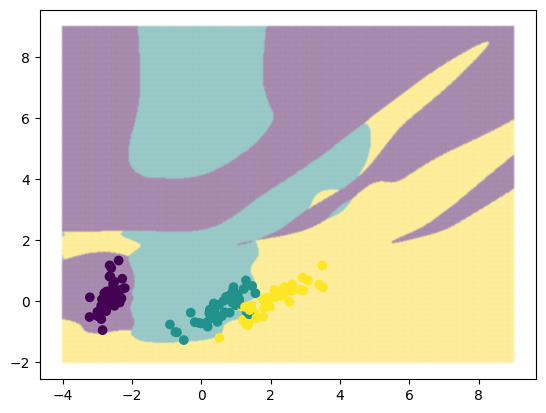

In [135]:
plt.scatter(xy[:, 0], xy[:, 1], c=tags2, alpha=0.07, s=1)
plt.scatter(dataset2d['train_input'][:, 0], dataset2d['train_input'][:, 1], c=dataset2d['train_label'])

График для третьей модели

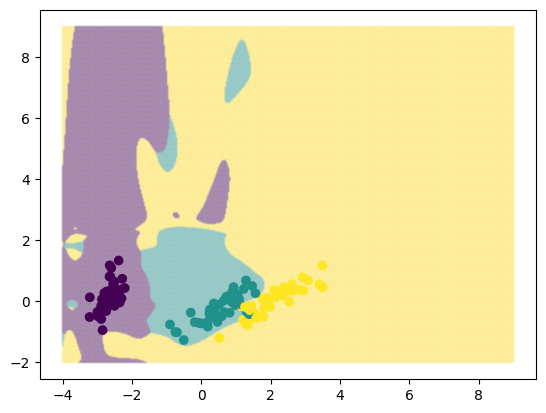

In [136]:
plt.scatter(xy[:, 0], xy[:, 1], c=tags3, alpha=0.07, s=1)
plt.scatter(dataset2d['train_input'][:, 0], dataset2d['train_input'][:, 1], c=dataset2d['train_label'])